## SVM Naive Bayes 이론

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from matplotlib import font_manager
font_fname="C:/Windows/Fonts/malgun.ttf"
font_family= font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"]=font_family

Text(0, 0.5, '특성 1')

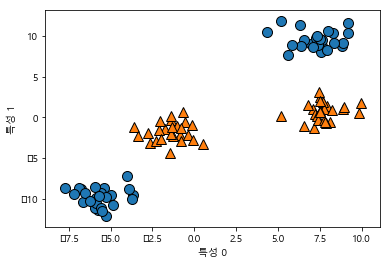

In [2]:
from sklearn.datasets import make_blobs

X,y=make_blobs(centers=4, random_state=8)
y=y%2
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#plt.xlabel("특성 0",fontproperties=fontprop)
#plt.ylabel("특성 1",fontproperties=fontprop)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

print("버전: ", mpl.__version__)
print("설치 위치: ", mpl.__file__)
print("설정 위치: ", mpl.get_configdir())
print("캐시 위치: ", mpl.get_cachedir())

print("설정 파일 위치: ", mpl.matplotlib_fname())

버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\Affinity\.matplotlib
캐시 위치:  C:\Users\Affinity\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
font_list=fm.findSystemFonts(fontpaths=None, fontext="ttf")

#ttf 폰트 전체개수
print(len(font_list))

958


In [5]:
font_list[:15]
f=[f.name for f in fm.fontManager.ttflist]
print(len(font_list))
#10개의 폰트 명만 출력
f[20:30]

958


['DejaVu Serif',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXNonUnicode']

In [6]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'DejaVu Serif' in f.name]
path="‪C:/Windows/Fonts/DejaVu Serif.ttf"
fontprop=fm.FontProperties(fname=path, size=10)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

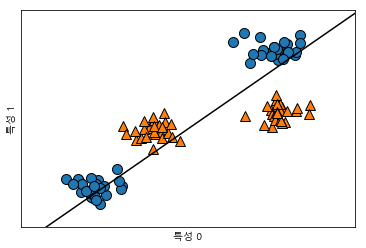

In [7]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0.5, 0, '특성1**2')

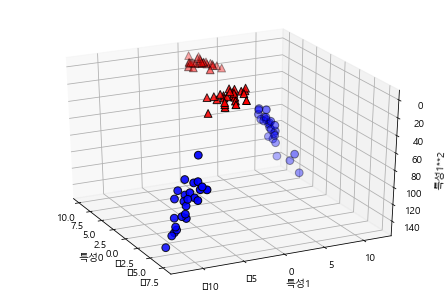

In [8]:
#두번째 특성을 제곱하여 추가합니다
X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

#3차원 그래프
ax=Axes3D(figure, elev=-152, azim=26)
#y==0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그립니다
mask= y==0
ax.scatter(X_new[mask,0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker="^",
          cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1**2')

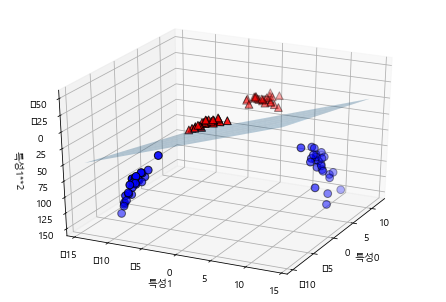

In [38]:
linear_svm_3d= LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure= plt.figure()
ax=Axes3D(figure,elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1], X_new[mask,2],c='b',
          cmap=mglearn.cm2, s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2], c='r', marker='^',
          cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")


Text(0, 0.5, '특성1')

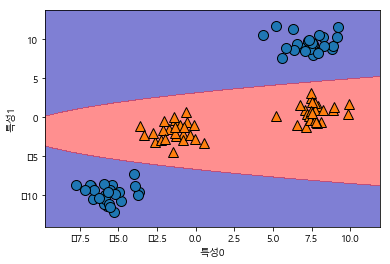

In [40]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("특성0")
plt.ylabel("특성1")

In [41]:
from sklearn.svm import SVC

Text(0, 0.5, '특성1')

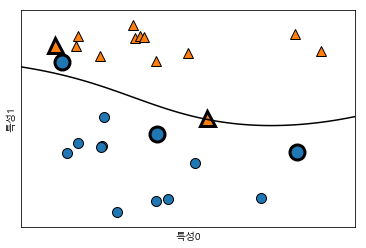

In [42]:
X,y= mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

#데이터 포인트 그리기
mglearn.discrete_scatter(X[:,0],X[:,1], y)
#서포트 벡터
sv=svm.support_vectors_

#dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")

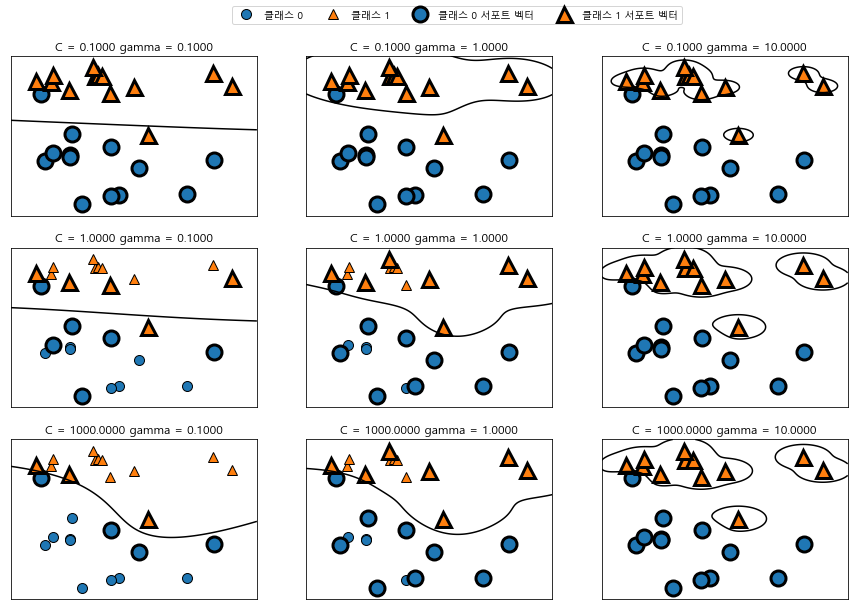

In [44]:
fig, axes=plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0,0].legend(["클래스 0","클래스 1","클래스 0 서포트 벡터",
                 "클래스 1 서포트 벡터"], ncol=4, loc=(.9,1.2))

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test =train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도 :{:.2f}".format(svc.score(X_test, y_test)))
#과대적합

훈련 세트 정확도: 1.00
테스트 세트 정확도 :0.63


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

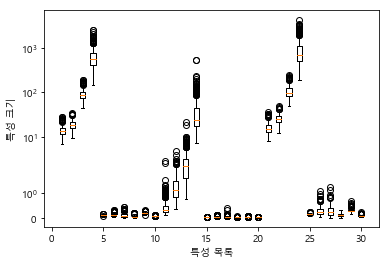

In [50]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [54]:
#훈련 세트에서 특성별 최솟값 계산
min_on_training=X_train.min(axis=0)
#훈련 세트에서 특성별 (최댓값-최솟값) 범위 계산
range_on_training=(X_train - min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면
#각 특성에 대해 최솟값은 0, 최댓값은 1입니다

X_train_scaled=(X_train - min_on_training)/range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [58]:
X_test_scaled=(X_test - min_on_training)/range_on_training
svc=SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [103]:
from numpy import *

def loadDataSet():
    postingList=[['my','dog','has','flea','problems','help','please'],
                 ['maybe','not','take','him','to','dog','park','stupid'],
                 ['my','dalmation','is','so','cute','I','love','him'],
                 ['stop','posting','stupid','worthless','garbage'],
                 ['mr','licks','ate','my','steak','how','to','stop','him'],
                 ['quit','buying','worthless','dog','food','stupid']]
    classVec=[0,1,0,1,0,1]
    return postingList,classVec

                 
def createVocabList(dataSet):
    vocabSet=set([])
    for document in dataSet:
        vocabSet=vocabSet|set(document)
    return list(vocabSet)

In [104]:
def setOfWords2Vec(vocabList,inputSet):
    returnVec=[0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)]=1
        else:print("the word:{}is not in my Vocabulary!".format(word))
    return returnVec

In [105]:
list0Posts, listClasses=loadDataSet()

In [106]:
list0Posts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [107]:
myVocabList=createVocabList(list0Posts)

In [108]:
myVocabList

['so',
 'worthless',
 'take',
 'I',
 'mr',
 'garbage',
 'how',
 'dog',
 'please',
 'buying',
 'stupid',
 'dalmation',
 'love',
 'stop',
 'flea',
 'quit',
 'help',
 'my',
 'ate',
 'not',
 'is',
 'park',
 'licks',
 'food',
 'problems',
 'him',
 'maybe',
 'cute',
 'has',
 'posting',
 'to',
 'steak']

In [109]:
setOfWords2Vec(myVocabList, list0Posts[0])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [138]:
def trainNB0(trainMatrix, trainCategory):
    numTrainDocs= len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive= sum(trainCategory)/float(numTrainDocs)
    #p0Num=zeros(numWords);p1Num=zeros(numWords)
    #p0Denom=0.0; p1Denom=0.0
    #실제 조건 반영 수정
    p0Num=ones(numWords);p1Num=ones(numWords)
    p0Denom=2.0; p1Denom=2.0
    for i in range(numTrainDocs):
        if trainCategory[i]==1:
            p1Num+=trainMatrix[i]
            p1Denom +=sum(trainMatrix[i])
        else:
            p0Num+=trainMatrix[i]
            p0Denom+=sum(trainMatrix[i])
    p1Vect=(p1Num/p1Denom)
    p0Vect=(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

In [139]:
trainMat=[]
for postinDoc in list0Posts:
    trainMat.append(setOfWords2Vec(myVocabList,postinDoc))

In [140]:
p0V,p1V,pAb=trainNB0(trainMat,listClasses)

In [141]:
pAb

0.5

In [142]:
p0V

array([0.07692308, 0.03846154, 0.03846154, 0.07692308, 0.07692308,
       0.03846154, 0.07692308, 0.07692308, 0.07692308, 0.03846154,
       0.03846154, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.03846154, 0.07692308, 0.15384615, 0.07692308, 0.03846154,
       0.07692308, 0.03846154, 0.07692308, 0.03846154, 0.07692308,
       0.11538462, 0.03846154, 0.07692308, 0.07692308, 0.03846154,
       0.07692308, 0.07692308])

In [143]:
p1V

array([0.04761905, 0.14285714, 0.0952381 , 0.04761905, 0.04761905,
       0.0952381 , 0.04761905, 0.14285714, 0.04761905, 0.0952381 ,
       0.19047619, 0.04761905, 0.04761905, 0.0952381 , 0.04761905,
       0.0952381 , 0.04761905, 0.04761905, 0.04761905, 0.0952381 ,
       0.04761905, 0.0952381 , 0.04761905, 0.0952381 , 0.04761905,
       0.0952381 , 0.0952381 , 0.04761905, 0.04761905, 0.0952381 ,
       0.0952381 , 0.04761905])

In [144]:
def classifyNB(vec2Classify, p0Vec,p1Vec,pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1.0-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [123]:
def testingNB():
    lis0Posts, listClasses=loadDataSet()
    #myVocabList=createVocabList1(list0Posts)
    #trainMat=[]
    #for postinDoc in list0Posts:
    #
    #
    testEntry=['love','my','dalmation','jinman']
    thisDoc=array(setOfWords2Vec(myVocabList,testEntry))
    print("{} classified as: {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))
    testEntry=['stupid','garbage']
    thisDoc=array(setOfWords2Vec(myVocabList, testEntry))
    print("{} classified as: {}".format(testEntry,classifyNB(thisDoc,p0V,p1V,pAb)))

In [124]:
testingNB()

the word:jinmanis not in my Vocabulary!
['love', 'my', 'dalmation', 'jinman'] classified as: 0
['stupid', 'garbage'] classified as: 0
